# **Predicting the Presence of Heart Disease of Patients Based on Medical Data**

### **Final Report**

##### Ernest Gao

### Introduction

- Heart disease remains the top cause of death in the United States and Canada. It is incurable and irreversible, however, numerous symptoms can be mitigated through the use of medications, medical interventions, and changes in lifestyle. Heart disease covers a broad spectrum of cardiovascular issues, encompassing various diseases and conditions.(Donovan, 2023).
- Heart disease risk factors include age, with older individuals more susceptible to artery and heart muscle issues, and sex, as men have a higher risk, which increases for women post-menopause. Family history, particularly early onset in parents, elevates the risk. Smoking significantly damages arteries, while unhealthy diets high in fat, salt, sugar, and cholesterol, along with high blood pressure, high cholesterol, diabetes, obesity, and inactivity, all contribute to heart disease. Chronic stress and poor dental health, which can lead to infections affecting the heart, further increase the risk (Mayo Clinic, 2022).
- Early diagnosis of heart disease is crucial for effective management and treatment, as it allows for timely interventions that can greatly enhance health outcomes and minimize future complications. The advantages of early detection include the potential for less invasive treatments and an improved quality of life for patients, as well as lower long-term healthcare costs for both individuals and healthcare systems (Boucher, 2024).
- This underscores the importance of early prediction and monitor. With this information, we raise the question: How accurate is the prediction the likelihood of a new patient having heart disease based on their age, chest pain type(cp), resting blood pressure(trestbps), serum cholestoral(chol), fasting blood sugar > 120 mg/dl(fbs), and maximum heart rate achieved(thalach)? \
This project aims to provide a representative predition model to evaluate or predict whether a patient might potentially be diagonized with heart disease based on the Cleveland Heart Disease dataset from the UCI Machine Learning Repository, which encompasses 14 clinical featurees with both numeric and categorical features, and one of them is the target feature which indicated the presence of heart disease based on a sacle of 4.
- This project will only focus on predicting the presence of heart disease with the following selected features: age, chest pain type(cp), resting blood pressure(trestbps), serum cholestoral(chol), fasting blood sugar > 120 mg/dl(fbs), and maximum heart rate achieved(thalach).

### Methods and Results

In [1]:
# importing libraries
library(tidyverse)
library(tidymodels)
library(repr)
library(RColorBrewer)

# formatting graphs
options(repr.plot.width = 10, repr.plot.height = 5)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

#### Preprocessing Data and Exploratory Data Analysis

- First, load the dataset from the data folder in the project repository using ```read_csv()```, setting the ```col_name = FALSE``` since the dataset file does not contain the column names.
- Clean the data by including column names to the dataset, removing "?" with NA, setting the correct type of the categorical columns using ```as.factor()```, and selecting the chosen features related to the project question.

In [2]:
set.seed(1234)
hd_data <- read_csv("data/heart_disease/processed.cleveland.data", col_names = FALSE)
head(hd_data)
tail(hd_data)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1 X2 X3 X4  X5  X6 X7 X8  X9 X10 X11 X12 X13 X14
1 63 1  1  145 233 1  2  150 0  2.3 3   0.0 6.0 0  
2 67 1  4  160 286 0  2  108 1  1.5 2   3.0 3.0 2  
3 67 1  4  120 229 0  2  129 1  2.6 2   2.0 7.0 1  
4 37 1  3  130 250 0  0  187 0  3.5 3   0.0 3.0 0  
5 41 0  2  130 204 0  2  172 0  1.4 1   0.0 3.0 0  
6 56 1  2  120 236 0  0  178 0  0.8 1   0.0 3.0 0

X1 X2 X3 X4  X5  X6 X7 X8  X9 X10 X11 X12 X13 X14
1 57 0  4  140 241 0  0  123 1  0.2 2   0.0 7.0 1  
2 45 1  1  110 264 0  0  132 0  1.2 2   0.0 7.0 1  
3 68 1  4  144 193 1  0  141 0  3.4 2   2.0 7.0 2  
4 57 1  4  130 131 0  0  115 1  1.2 2   1.0 7.0 3  
5 57 0  2  130 236 0  2  174 0  0.0 2   1.0 3.0 1  
6 38 1  3  138 175 0  0  173 0  0.0 1   ?   3.0 0

In [3]:
hd_clean <- hd_data
colnames(hd_clean) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", 
                       "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

hd_clean <- mutate_all(hd_clean, ~ifelse(. == "?", NA, .))
hd_clean <- hd_clean |>
            mutate(
                sex = as.factor(sex),
                cp = as.factor(cp),
                fbs = as.factor(fbs),
                restecg = as.factor(restecg),
                exang = as.factor(exang),
                slope = as.factor(slope),
                thal = as.factor(thal)) |>
                select(age, cp, trestbps, chol, fbs, thalach, num)

head(hd_clean)
dim(hd_clean)

age cp trestbps chol fbs thalach num
1 63  1  145      233  1   150     0  
2 67  4  160      286  0   108     2  
3 67  4  120      229  0   129     1  
4 37  3  130      250  0   187     0  
5 41  2  130      204  0   172     0  
6 56  2  120      236  0   178     0

[1] 303   7

#### Dataset Splitting

- Split the data set into training and testing data sets to not violate the golden rule when training and fitting the model and get a more reliable testing result.
- With 75% of training and 25% testing data set, and the target being num.

In [4]:
hd_split <- initial_split(hd_clean, prop = 0.75, strata = num)

hd_training <- training(hd_split)
hd_testing <- testing(hd_split)

#### EDA

- Use ```summary()``` to get some basic information relevant for exploratory data analysis related to the planned analysis (details are explained in proposal).
- One bar plot and one scatter plot are generated to visualize the relationship between the varaibles and how are the data points with different heart disease num located.

In [5]:
summary(hd_training)

      age        cp         trestbps          chol       fbs    
 Min.   :35.00   1: 18   Min.   :100.0   Min.   :126.0   0:192  
 1st Qu.:49.00   2: 36   1st Qu.:120.0   1st Qu.:211.2   1: 34  
 Median :56.00   3: 70   Median :130.0   Median :239.0          
 Mean   :55.07   4:102   Mean   :133.1   Mean   :247.3          
 3rd Qu.:61.00           3rd Qu.:140.0   3rd Qu.:275.5          
 Max.   :77.00           Max.   :192.0   Max.   :564.0          
    thalach           num        
 Min.   : 88.0   Min.   :0.0000  
 1st Qu.:134.5   1st Qu.:0.0000  
 Median :152.5   Median :0.0000  
 Mean   :149.9   Mean   :0.9513  
 3rd Qu.:165.8   3rd Qu.:2.0000  
 Max.   :195.0   Max.   :4.0000  

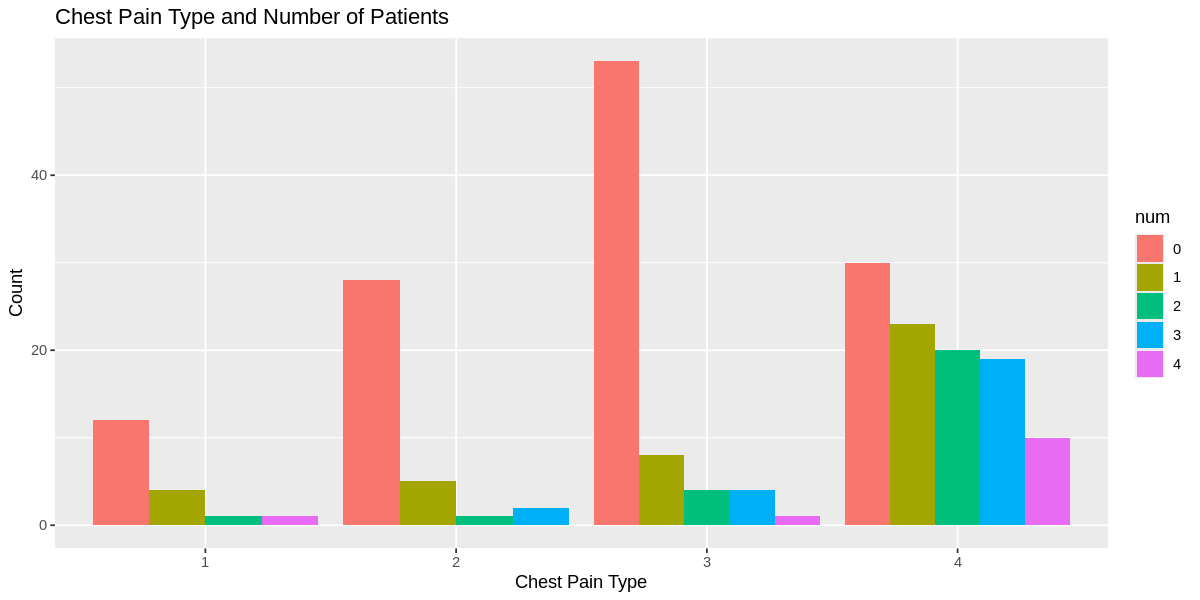

In [6]:
ggplot(hd_training, aes(x=cp, fill = as.factor(num))) +
            geom_bar(position = "dodge") +
            labs(title = "Chest Pain Type and Number of Patients", x = "Chest Pain Type", y = "Count", fill = "num")

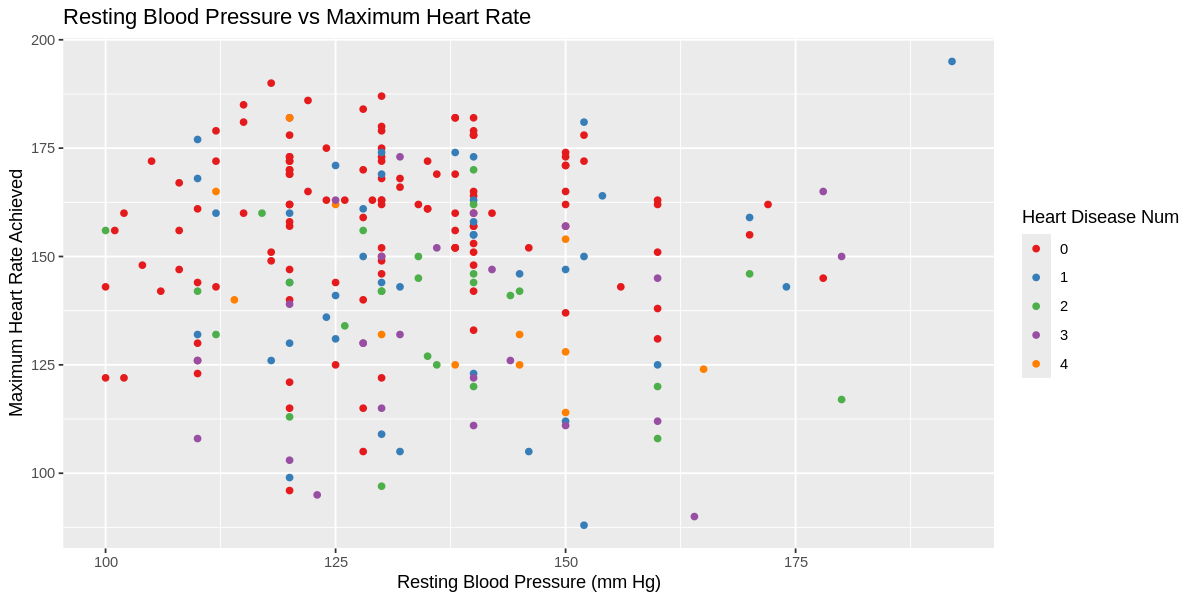

In [7]:
ggplot(hd_training, aes(x = trestbps, y = thalach, color = as.factor(num))) +
                 geom_point() +
                 labs(x = "Resting Blood Pressure (mm Hg)", y = "Maximum Heart Rate Achieved",
                      color = "Heart Disease Num", title = "Resting Blood Pressure vs Maximum Heart Rate") +
                 scale_color_brewer(palette = "Set1")

From the bar plots, we can see that for type 2 and 3 chest pain, 0 is the obvious dominant heart disease num which is not present. In the scatter plot below, we can see that zeros are mostly located on the upper left part of the diagram.

#### Hyperparameter Tuning and Cross-Validation

- The project will evaluate the plausiblity of knn with regression as the predicting model.
- The number of neighbors in knn will be tuned to get the optimal score.
- The `hd_recipe` is first created using `recipe()` and all the numeric columns are scaled and centered.
- `hd_spec` is created as `nearest_neighbor` regression model with `neighbors=tune()` for tuning purpose. 
- `hd_vfold` created for cross-validation.
- `hd_workflow` created using `workflow()` and cross-validation performed with `gridvals` from 1 to 101 with a space of 5, then the cross-validation mean scores are collected.
- The project uses RMSPE to evaluate the performance of the model, hence from the results, using `filter(.metric == "rmse")` to get the RMSPE values for each cross-validation and then find the minimum among all the scores to get the optimal number of neighbors.
- A visualization of the number of neighbors K vs mean score is shown.

In [8]:
set.seed(1234)

hd_recipe <- recipe(num ~ ., data = hd_training) |>
   step_scale(all_numeric(), -all_outcomes()) |>
   step_center(all_numeric(), -all_outcomes())

hd_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("regression")

hd_vfold <- vfold_cv(hd_training, v = 5, strata = num)

hd_workflow <- workflow() |>
  add_recipe(hd_recipe) |>
  add_model(hd_spec)

gridvals <- tibble(neighbors = seq(from = 1, to = 101, by = 5))
hd_results <- hd_workflow |>
  tune_grid(resamples = hd_vfold, grid = gridvals) |>
  collect_metrics()

hd_rmse <- hd_results |>
   filter(.metric == "rmse")

hd_min <- slice_min(hd_rmse, mean, n=1)

hd_min

neighbors .metric .estimator mean     n std_err    .config              
1 6         rmse    standard   1.073991 5 0.07796254 Preprocessor1_Model02

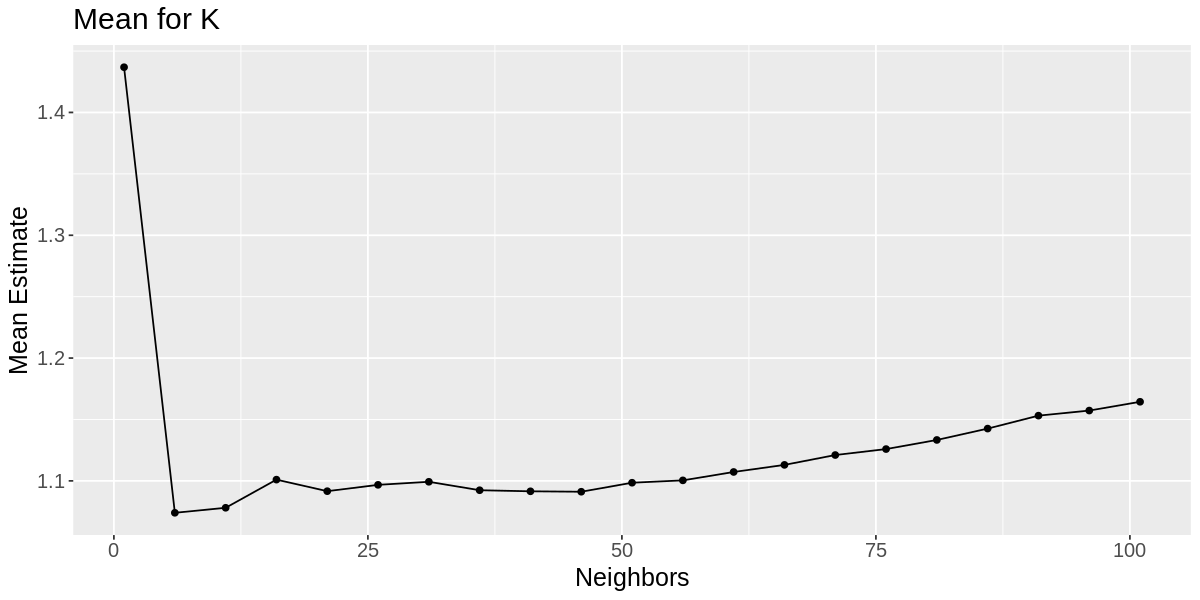

In [9]:
ggplot(hd_rmse, aes(x=neighbors, y=mean)) +
geom_point() +
geom_line() +
labs(x = "Neighbors", y = "Mean Estimate", title = "Mean for K") +
theme(text = element_text(size = 15))

#### Constructing The Optimal Model

- With k=k_min, build the hd_spec again.

In [10]:
k_min <- hd_min |>
         pull(neighbors)

hd_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_min) |>
         set_engine("kknn") |>
         set_mode("regression")

hd_best_fit <- workflow() |>
         add_recipe(hd_recipe) |>
         add_model(hd_best_spec) |>
         fit(data = hd_training)

#### Overfitting/Underfitting

The graph is fluctuating a lot meaning it is overfitting.

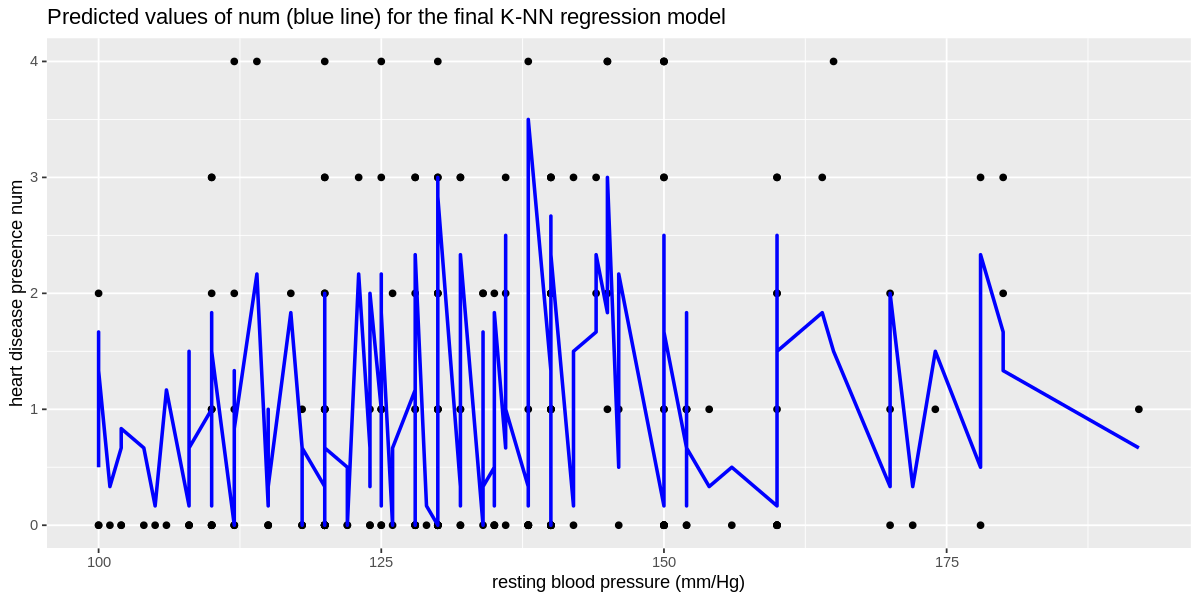

In [29]:
hd_preds <- hd_best_fit |>
          predict(hd_training) |>
          bind_cols(hd_training)

ggplot(hd_training, aes(x=trestbps, y=num)) +
                    geom_point() + 
                    geom_line(data = hd_preds,
                    mapping = aes(x = trestbps, y = .pred),
                    color = "blue",
                    linewidth = 1) +
                    labs(x="resting blood pressure (mm/Hg)", y="heart disease presence num", 
                    title="Predicted values of num (blue line) for the final K-NN regression model")

#### Accessing Test data

In [12]:
hd_summary <- hd_best_fit |>
          predict(hd_testing) |>
          bind_cols(hd_testing) |>
          metrics(truth = num, estimate = .pred)
hd_summary

.metric .estimator .estimate
1 rmse    standard   1.0059348
2 rsq     standard   0.2653354
3 mae     standard   0.7424242

From the result and the graph above, we can see that the regression model is doing a terrible job here and it is overfitting the dataset probably because the linear model cannot properly fit the data, and lots of noise are captured. The rmse is around 1 which is too big that indicated that the model is not performing well.

#### Using Classification Model

- Since the regression model is doing badly, following the same procedure above, by replacing the num column into a categorical column representing the presence of heart disease.
- Use`strata = presence` and  `set_mode("classification")`.

In [13]:
# Processing and Splitting the data
hd_clean_class <- hd_clean |>
            mutate(presence = as.factor(ifelse(num > 0, 1, 0))) |>
                select(age, cp, trestbps, chol, fbs, thalach, presence)

hd_class_split <- initial_split(hd_clean_class, prop = 0.75, strata = presence)

hd_class_training <- training(hd_class_split)
hd_class_testing <- testing(hd_class_split)

In [14]:
set.seed(1234)
# Hyperparameter Tuning
hd_class_recipe <- recipe(presence ~ ., data = hd_class_training) |>
   step_scale(all_numeric(), -all_outcomes()) |>
   step_center(all_numeric(), -all_outcomes())

hd_class_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")

hd_class_vfold <- vfold_cv(hd_class_training, v = 5, strata = presence)

hd_class_workflow <- workflow() |>
  add_recipe(hd_class_recipe) |>
  add_model(hd_class_spec)

gridvals <- tibble(neighbors = seq(from = 1, to = 101, by = 5))
hd_class_results <- hd_class_workflow |>
  tune_grid(resamples = hd_class_vfold, grid = gridvals) |>
  collect_metrics()

hd_class_acc <- hd_class_results |>
   filter(.metric == "accuracy")

hd_class_max <- slice_max(hd_class_acc, mean, n=1)

hd_class_max

neighbors .metric  .estimator mean      n std_err    .config              
1 86        accuracy binary     0.7400527 5 0.02813120 Preprocessor1_Model18
2 91        accuracy binary     0.7400527 5 0.03205713 Preprocessor1_Model19

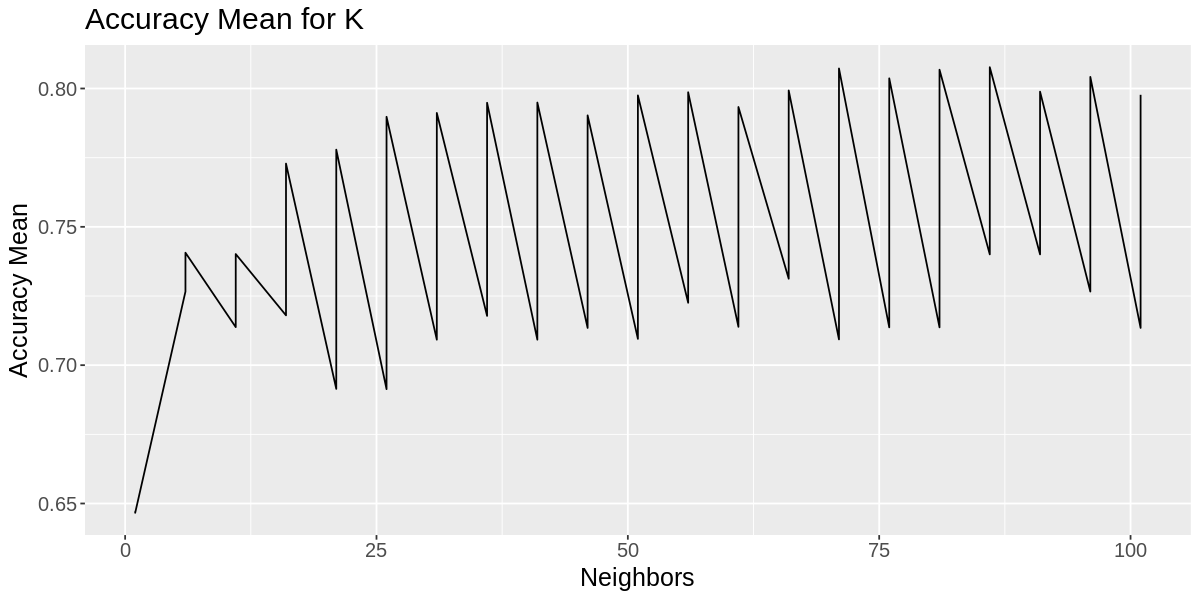

In [15]:
ggplot(hd_class_results, aes(x = neighbors, y = mean)) +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Mean", title = "Accuracy Mean for K") +
      theme(text = element_text(size = 15))

In [16]:
# Contructing Optimal Model With K_max
k_max <- hd_class_max |>
         slice(1) |>
         pull(neighbors)

hd_class_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = k_max) |>
         set_engine("kknn") |>
         set_mode("classification")

hd_class_best_fit <- workflow() |>
         add_recipe(hd_class_recipe) |>
         add_model(hd_class_best_spec) |>
         fit(data = hd_class_training)

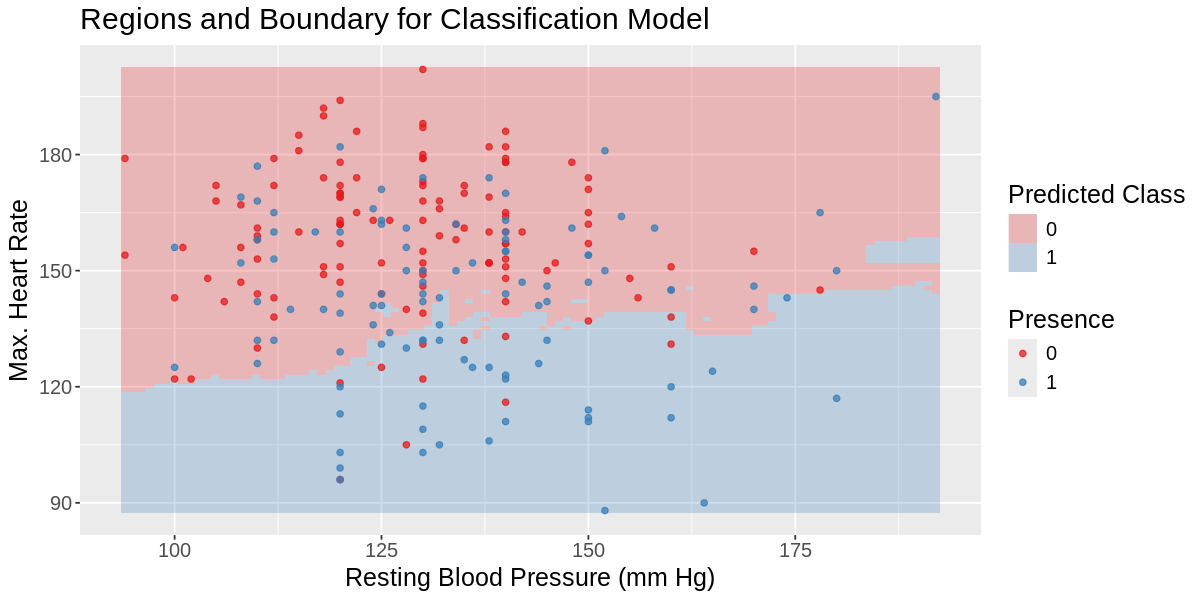

In [28]:
# Plotting the Boundary Regions Of Predictions
hd_class_preds <- hd_class_best_fit |>
          predict(hd_class_training) |>
          bind_cols(hd_class_training)

grid <- expand.grid(
  trestbps = seq(min(hd_class_preds$trestbps), max(hd_class_preds$trestbps), length.out = 100),
  thalach = seq(min(hd_class_preds$thalach), max(hd_class_preds$thalach), length.out = 100),
  age = mean(hd_class_preds$age),
  chol = mean(hd_class_preds$chol),
  cp = factor(levels(hd_class_preds$cp)[1], levels = levels(hd_class_preds$cp)),
  fbs = factor(levels(hd_class_preds$fbs)[1], levels = levels(hd_class_preds$fbs))
)

# Predict the class for each point in the grid
grid_predictions <- predict(hd_class_best_fit, new_data = grid) |>
  bind_cols(grid)

# Plot the data points and decision boundary
ggplot(data = hd_class_preds) + 
  geom_tile(data = grid_predictions, aes(x = trestbps, y = thalach, fill = .pred_class), alpha = 0.25) +
  geom_point(mapping = aes(x = trestbps, y = thalach, color = presence), alpha = 0.75) +
  labs(x = "Resting Blood Pressure (mm Hg)", y = "Max. Heart Rate", 
       color = "Presence", fill = "Predicted Class", 
       title = "Regions and Boundary for Classification Model") +
  scale_color_brewer(palette = "Set1") +
  scale_fill_brewer(palette = "Set1") +
  theme(text = element_text(size = 15))

In [26]:
# Testing Data with Classification
hd_class_summary <- hd_class_best_fit |>
          predict(hd_class_testing) |>
          bind_cols(hd_class_testing) |>
          metrics(truth = presence, estimate = .pred_class)
hd_class_summary

.metric  .estimator .estimate
1 accuracy binary     0.7236842
2 kap      binary     0.4403927

In [27]:
confusion_matrix <- hd_class_best_fit |>
          predict(hd_class_testing) |>
          bind_cols(hd_class_testing) |>
          conf_mat(truth = presence, estimate = .pred_class)
confusion_matrix

          Truth
Prediction  0  1
         0 32 12
         1  9 23

### Discussion

#### Summaries

- The project explored accuracy and the performance of the prediction of heart disease presence using the Cleveland Heart Disease dataset. Initially used a KNN regression model to predict the continuous target variable num, which indicates the presence of heart disease on a scale from 0 to 4. The regression model showed significant overfitting and poor performance, as evidenced by a high RMSE value around 1. The model could not capture the complexities of the data and was not suitable for the regression task.
- Subsequently, The num variable is converted into a binary classification target, representing the presence or absence of heart disease, then applied the KNN classification model. The classification model performed significantly better than the regression model with the optimal number of neighbors obtained by hyperparameter tuning, giving a training accuracy at 74% and testing accuracy at 72%. From the confusion matrix with test data set, it demonstrates a recall of 66% and precision of 72%. In predicting heart disease, a high recall is relatively important since false negatives (patients incorrectly identified as not having heart disease) is more devastating and has to be mitigated.

#### Expectation vs. Reality

- It was anticipated that the regression model might capture the heart disease presence more effectively, given that the target variable num is a scale rather than a binary outcome. However, the regression model's poor performance highlighted that the scale was too noisy and did not align well with the linear assumptions made by the regression model. On the other hand, the classification model's slightly improved performance was more aligned with typical outcomes for binary health predictions, which reinforced the importance of simplifying complex medical data into more actionable categories.
- Generally, it was also believed that the performance of the prediction models should be promising, where a rmspe less than 0.5 is achieved for the regression model and a test accuracy of 80% and a high recall are achieved for the classification model. Obviously, both models are not able to be deployed as it might create unreliable outputs, affect the diagnosis of doctors, and harm the patients.

#### Impacts

- This project emphasize that a high accuracy and recall of prediction model is crucial in predicting the presence of heart disese, and regression models propabaly are not the best way for heart disease prediction. There might be ways to improve the performance of regression model such as further features engineering and preprocessing, but binarize the problem then using classification techniques might just be simpler and more efficient. Moreover, this project encourage other researchers and practitioners to find and develop a prediction model with higher accuracy can which be more confidently integrated into clinical decision-making processes, potentially reducing long-term healthcare costs and providing quality treatments for patients through early diagnosis.

#### Future Questions

- For future researches that are interested in releated fields, some worthy questions that can be probe into are:
  - Whether other machine learning models, such as ensemble methods (e.g., Random Forest), could further improve prediction accuracy for heart disease.
  - Whether applying feature engineering (e.g., One Hot Encoding) and other preprocessing techniques help with a better predition results.
  - How well the model performs across different populations or regions.
  - Which of the features is the most important factor for predicting heart disease.
  - etc.
- Ongoing research and model refinement are necessary to continue improving the prediction and management of heart disease.

### References

Boucher, J.-F. (2024, April 9). The benefits of early diagnosis for heart disease. Laval Cardiovascular Evaluation Center. https://www.centrecardiolaval.com/en/2024/03/06/the-benefits-of039early-diagnosis-for-heart-disease/

Donovan, R. (2023, July 27). Heart disease: Risk factors, prevention, and more. Healthline. https://www.healthline.com/health/heart-disease

Mayo Foundation for Medical Education and Research. (2022, August 25). Heart disease. Mayo Clinic. https://www.mayoclinic.org/diseases-conditions/heart-disease/symptoms-causes/syc-20353118#:~:text=Heart%20disease%20describes%20a%20range,born%20with%20(congenital%20heart%20defects) 